In [1]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

In [2]:
''' train and test path '''
train_path = pathlib.Path("../input/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
test_path = pathlib.Path('../input/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
''' length of train data '''
train_image_len = len(list(train_path.glob('*/*.jpg')))
print(train_image_len)

''' length of test data '''
test_image_len = len(list(test_path.glob('*/*.jpg')))
print(test_image_len)

2239
118


In [4]:
''' initializing some variables '''
batch_size = 32
img_h = 180
img_w = 180

In [5]:
''' data augmentation '''
''' using 80-20 split of data, 80% for training and 20% for validation '''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_h, img_w),
    batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_h, img_w),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
''' classes names '''
c_names = train_ds.class_names
print(c_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


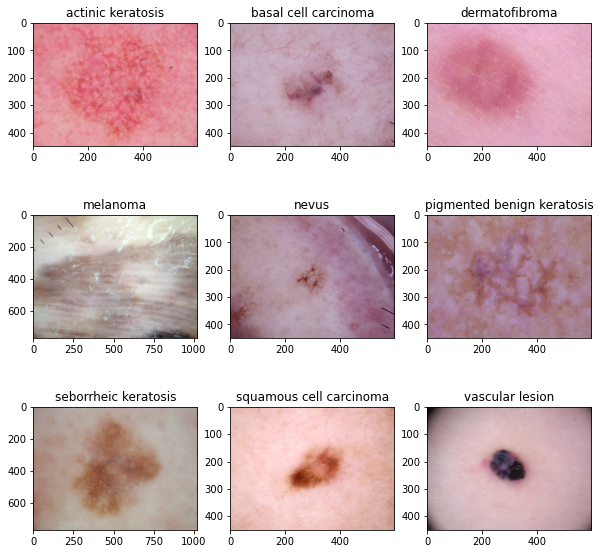

In [8]:
''' plotting some images '''
for i in range(9): 
    plt.figure(figsize=(10,10))
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(str(list(train_ds.glob(c_names[i]+'/*.jpg'))[1]))
    plt.title(c_names[i])
    plt.imshow(image)

In [9]:
''' AUTOTUNE '''
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
''' Model '''
n_c = 9

''' preprocessing layer '''
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_h, img_,3))])

''' Convolutional Layers '''
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
model.add(Dropout(0.25))
model.add(Flatten())

''' Classification Layer'''
model.add(Dense(n_c, activation = "softmax"))

In [12]:
''' Compile the model '''
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
''' lets see how looks like '''
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        2

In [14]:
''' training '''
epochs=30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
56/56 [==============================] - 39s 187ms/step - loss: 2.0967 - accuracy: 0.1792 - val_loss: 2.0419 - val_accuracy: 0.2260
Epoch 2/30
56/56 [==============================] - 2s 42ms/step - loss: 1.9621 - accuracy: 0.2729 - val_loss: 1.8453 - val_accuracy: 0.3221
Epoch 3/30
56/56 [==============================] - 2s 42ms/step - loss: 1.7887 - accuracy: 0.3274 - val_loss: 1.6378 - val_accuracy: 0.3915
Epoch 4/30
56/56 [==============================] - 2s 43ms/step - loss: 1.6739 - accuracy: 0.3888 - val_loss: 1.6628 - val_accuracy: 0.4340
Epoch 5/30
56/56 [==============================] - 2s 42ms/step - loss: 1.6105 - accuracy: 0.4201 - val_loss: 1.6095 - val_accuracy: 0.4228
Epoch 6/30
56/56 [==============================] - 2s 42ms/step - loss: 1.5925 - accuracy: 0.4263 - val_loss: 1.6190 - val_accuracy: 0.4564
Epoch 7/30
56/56 [==============================] - 2s 42ms/step - loss: 1.5462 - accuracy: 0.4509 - val_loss: 1.5661 - val_accuracy: 0.4362
Epoch 8/30


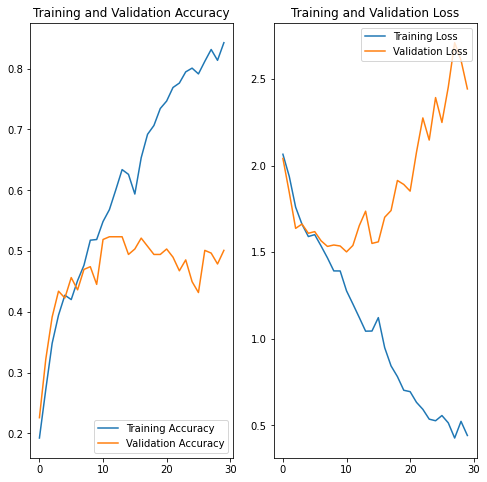

In [15]:
''' plotting training accuracy and validation accuracy graph '''
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' plotting training loss and validation loss graph '''
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
''' augmentation '''
augmentation = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", 
                                                                          input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), 
                                                                          width_factor=(0.2, 0.3), fill_mode='reflect')])

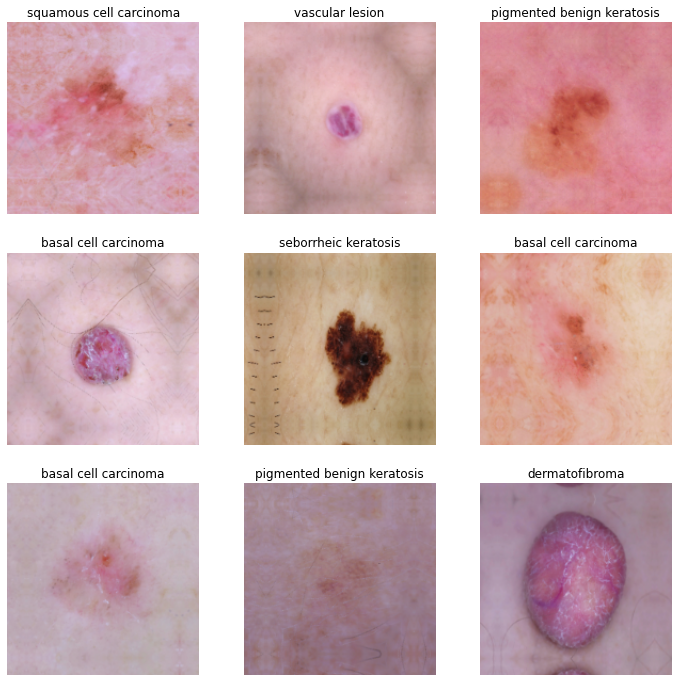

In [17]:
''' ploting some augmented images '''
for img, lbls in train_ds.take(1):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmentation(img)[i].numpy().astype("uint8"))
        plt.title(c_names[lbl[i]])
        plt.axis("off")

In [18]:
''' Model with Augmentation '''
n_classes = 9

''' preprocess layer '''
model = Sequential([augmentation, layers.experimental.preprocessing.Rescaling(1./255, 
                                                                              input_shape=(img_height, img_width,3))])
''' Convolutional layers '''
model.add(Conv2D(filters = 32, kernel_size=(5,5), padding='Same',  activation ='relu', input_shape=(180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size=(5,5),padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

''' adding dropout '''
model.add(Dropout(0.25))
model.add(Flatten())

''' classification layer '''
model.add(Dense(n_classes, activation = "softmax"))


In [19]:
''' compile the model '''
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
''' training '''
epochs=30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
56/56 [==============================] - 3s 46ms/step - loss: 2.0556 - accuracy: 0.2013 - val_loss: 1.8614 - val_accuracy: 0.3221
Epoch 2/30
56/56 [==============================] - 2s 43ms/step - loss: 1.8633 - accuracy: 0.3309 - val_loss: 1.6795 - val_accuracy: 0.4228
Epoch 3/30
56/56 [==============================] - 2s 43ms/step - loss: 1.6612 - accuracy: 0.4078 - val_loss: 1.5704 - val_accuracy: 0.4430
Epoch 4/30
56/56 [==============================] - 2s 44ms/step - loss: 1.5722 - accuracy: 0.4323 - val_loss: 1.4883 - val_accuracy: 0.4855
Epoch 5/30
56/56 [==============================] - 2s 43ms/step - loss: 1.5263 - accuracy: 0.4476 - val_loss: 1.6166 - val_accuracy: 0.4586
Epoch 6/30
56/56 [==============================] - 2s 43ms/step - loss: 1.6074 - accuracy: 0.4138 - val_loss: 1.5532 - val_accuracy: 0.4787
Epoch 7/30
56/56 [==============================] - 2s 44ms/step - loss: 1.5026 - accuracy: 0.4825 - val_loss: 1.5627 - val_accuracy: 0.4519
Epoch 8/30
56

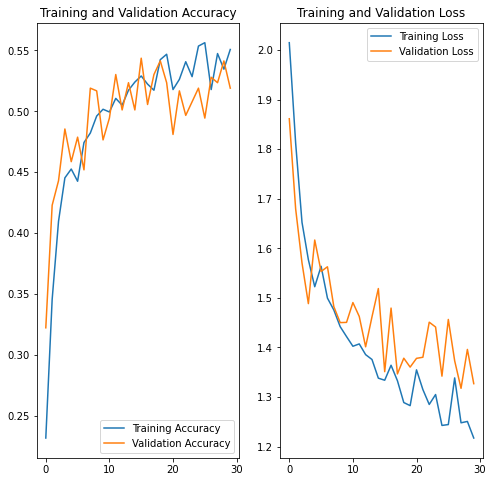

In [21]:
''' plotting training accuracy and validation accuracy graph '''
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

''' plotting training loss and validation loss graph '''
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
p_list=[]
l_list=[]
for i in c_names:
    for j in train_path.glob(i+'/*.jpg'):
        p_list.append(str(j))
        l_list.append(i)
        
df_dict = dict(zip(path_list, lesion_list))
org_df = pd.DataFrame(list(df_dict.items()),columns = ['Path','Label'])
org_df

,Path,Label
0,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
1,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
2,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
3,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
4,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
...,...,...
2234,../input/skin-cancer/Skin cancer ISIC The Inte...,vascular lesion
2235,../input/skin-cancer/Skin cancer ISIC The Inte...,vascular lesion
2236,../input/skin-cancer/Skin cancer ISIC The Inte...,vascular lesion
2237,../input/skin-cancer/Skin cancer ISIC The Inte...,vascular lesion


<BarContainer object of 9 artists>

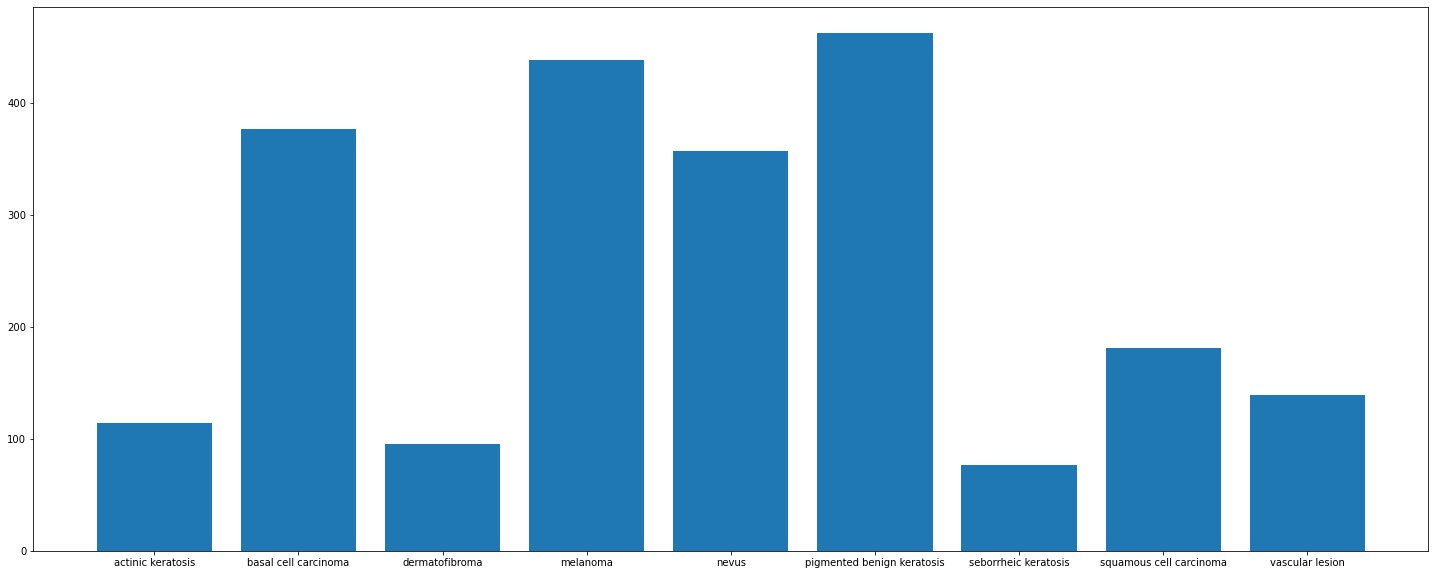

In [24]:
''' barplot '''
count=[]
for i in c_names:
    count.append(len(list(train_path.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)